In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [29]:
import gzip
import pickle
import tensorflow as tf
import numpy as np

To open a zipped dataset

In [30]:

def load_data():
#f = gzip.open('C:\Users\dipay\OneDrive\Downloads\AI_ML_IIIT_Bangalore\CNN\KERAS\mnist.pkl.gz','rb')
    with gzip.open(r'C:\Users\dipay\OneDrive\Downloads\AI_ML_IIIT_Bangalore\CNN\KERAS\mnist.pkl.gz', 'rb') as f:
    # Read the content of the gzip file
        f.seek(0)
        training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    #f.close()
    return (training_data, validation_data, test_data)


Settings for Displaying Array elements

Displaying 5000 array elements.For inifinite display or display without truncation, we use the threshold parameter as 'np.inf' meaning infinity. 
threshold_value: An integer specifying the threshold value. If the number of elements in the array exceeds this value, the array will be truncated in the display output.
By default, the threshold parameter is set to 1000. Setting it to np.inf disables truncation, meaning that all array elements will be displayed without summarization, regardless of their number.

In [15]:
np.set_printoptions(threshold=np.inf)

In [17]:
training_data, validation_data, test_data = load_data()

In [16]:
np.set_printoptions(500,500)


In [18]:
print(training_data)

(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([5, 0, 4, ..., 8, 4, 8], dtype=int64))


FRom above data structure we see that the training data has 2 array element training_data[0] is the input dataset and training_data[1] is the output classification

In [22]:
print ('the shape feature dataset is' + str(training_data[0].shape))

the shape feature dataset is(50000, 784)


In [23]:
print ('the classification dataset is' + str(training_data[1]))
print ('the shape of classification dataset is' + str(training_data[1].shape))

the classification dataset is[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1 5 7 1 7 1 1 6 3 0 2 9
 3 1 1 0 4 9 2 0 0 2 0 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3 8 5 4 7 7 4 2 8 5 8 6
 7 3 4 6 1 9 9 6 0 3 7 2 8 2 9 4 4 6 4 9 7 0 9 2 9 5 1 5 9 1 2 3 2 3 5 9 1
 7 6 2 8 2 2 5 0 7 4 9 7 8 3 2 1 1 8 3 6 1 0 3 1 0 0 1 7 2 7 3 0 4 6 5 2 6
 4 7 1 8 9 9 3 0 7 1 0 2 0 3 5 4 6 5 8 6 3 7 5 8 0 9 1 0 3 1 2 2 3 3 6 4 7
 5 0 6 2 7 9 8 5 9 2 1 1 4 4 5 6 4 1 2 5 3 9 3 9 0 5 9 6 5 7 4 1 3 4 0 4 8
 0 4 3 6 8 7 6 0 9 7 5 7 2 1 1 6 8 9 4 1 5 2 2 9 0 3 9 6 7 2 0 3 5 4 3 6 5
 8 9 5 4 7 4 2 7 3 4 8 9 1 9 2 8 7 9 1 8 7 4 1 3 1 1 0 2 3 9 4 9 2 1 6 8 4
 7 7 4 4 9 2 5 7 2 4 4 2 1 9 7 2 8 7 6 9 2 2 3 8 1 6 5 1 1 0 2 6 4 5 8 3 1
 5 1 9 2 7 4 4 4 8 1 5 8 9 5 6 7 9 9 3 7 0 9 0 6 6 2 3 9 0 7 5 4 8 0 9 4 1
 2 8 7 1 2 6 1 0 3 0 1 1 8 2 0 3 9 4 0 5 0 6 1 7 7 8 1 9 2 0 5 1 2 2 7 

In [19]:
np.set_printoptions(threshold=np.inf)
training_array = training_data[1]
training_array

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2,
       9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4,
       5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9,
       9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5,
       9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8,
       3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5,
       2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6,
       3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7,
       9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9,
       6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8,

Understanding One hot Encoding necessary for result data verification

Why do we need to One Hot encode the result element ?

The input dataset is a representation of pixel values. The output dataset or result classifies each of the image as the digit itself. However, we need to convert the 
representation of each image classification as a matrix with matching dimensions as the number of pixels of the input dataset. 

So if the number of pixels in the input data set is 784, the shape of the input matrix will be [n X 784] where n is the number of training examples. 
the training result data set is current (n X 1) where n represents number of rows and 1 is the number of column. We need to encode this matrix to get the resultant 
output matrix to match the dimensions so as to feed it into our algorthm. 


In [36]:
import numpy as np

Demo matrix for One Hot encoding

In [39]:
new_array_demo = np.zeros((10,12)) #This generates a blank matrix with all of its element as 0 for the provided dimension. 
new_array_demo

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [40]:
new_array_demo [0][1] = 1.0 # we can set value of any of the elements with this statement. 
new_array_demo

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [44]:
# generate a dummy matrix of element to fill up the above generated array. 
# The length of this matrix is to define the number of classifications expected. 
k = ([0,1,2,3,4,5,6,7,8,9])

In [45]:
np.set_printoptions(threshold=np.inf)

In [46]:
# classification Matrix to represent in a One Hot Encoded format
classification_result = ([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 7]) #Length of array = 12 

We specify the index as an incremental number within a for loop. Within the For Loop we will set the corresponding element value of each row and column. 
We consider the 'classification_result' as an input to the FOR loop. Setting each element within the new array created with the notation  

[row = corresponding element within the classification_result] X [column = counter for index]

so in the first iteration the 5th row and 0th column will be populated as 1.0. In Second iteration, 0th row and 2nd column will be marked as 1.0. 
Likewise, the new array will be filled up with 1 after identifying the element of the classification_result within the corresponding column of each row. 

Thus the dimension of the new array or the one hot encoded matrix should correspond to the length of the classificaion data elements or else out of bound error will get returned.

Number of rows (10) = number of expected classification

number of Columns of the new_array matrix = Length of Elements of the classification data (12)(classification examples or 50,000 in our original case)




In [47]:
new_array = np.zeros((10,12)) #This generates a blank matrix with all of its element as 0 for the provided dimension. 
new_array

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [48]:
index = 0
for element in classification_result:
    new_array [element][index] = 1.0
    index = index + 1

new_array

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [49]:
new_array.shape

(10, 12)

Defining a function for One Hot Encoding 

In [31]:
def one_hot(j): # j is expected to be our output training data
    n = j.shape[0] # n will be the length of the output matrix 
    new_array = np.zeros((10,n)) #Creating new OHE array with 10 rows as expected number of classifications and n columns (num of examples)
    index = 0 # Setting a counter to loop over the number of examples
    for res in j:
        new_array[res][index]= 1.0
        index = index + 1
    return new_array



Verifying our function for a known dataset

In [53]:
known_dataset = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
one_hot(known_dataset)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

Setting up the actual data for Model compilation

In [54]:
tr_d, va_d, te_d = load_data()

In [55]:
np.set_printoptions(threshold=10000)

In [57]:
training_inputs = np.array(tr_d[0][:])
training_inputs.shape

(50000, 784)

In [59]:
training_results = np.array(tr_d[1][:])
training_results.shape

(50000,)

The array shape notation (50000,) indicates that you're dealing with a one-dimensional array (also known as a vector) with 50,000 elements.

In NumPy, the shape of an array is represented as a tuple of integers, where each integer specifies the size of the array along a particular dimension. For a one-dimensional array, you only need to specify the number of elements in that dimension.

In the notation (50000,):

The comma , indicates that it's a tuple.
The number 50000 represents the size of the array along the first (and only) dimension.
So, (50000,) indicates that you have a one-dimensional array with 50,000 elements.

For implementation in KERAS, the input training and input target dataset are supposed to have shape (m x n) where m is the number of training samples and n is the number of parts
in a single input.

Let us write a function to encapsulate the data

In [22]:
def data_wrapper():
    train_data, validate_data , test_data = load_data()
    training_input = np.array(train_data[0][:])
    train_result = np.array(train_data[1][:])
    train_output = one_hot(train_result)
    train_y = train_output[:].T

    val_inp = np.array(validate_data[0][:])
    val_result = np.array(validate_data[1][:])
    val_output = one_hot(val_result)
    val_y = val_output[:].T

    test_inp = np.array(test_data[0][:])
    test_result = np.array(test_data[1][:])
    test_output = one_hot(val_result)
    test_y = test_output[:].T

    return (training_input,train_y,val_inp, val_y)


In [23]:
train_x, train_y, val_x, val_y = data_wrapper()

In [32]:
print ("The train_x shape is :" + str(train_x.shape))
print ("The train_y shape is :" + str(train_y.shape))
print ("The val_x shape is :" + str(val_x.shape))
print ("The val_y shape is :" + str(val_y.shape))

The train_x shape is :(50000, 784)
The train_y shape is :(50000, 10)
The val_x shape is :(10000, 784)
The val_y shape is :(10000, 10)


Now let us visualise the data set one for the image representation one at a time. 
We will start off by examining the record at row number 1000 out of the total lot of 50000 data. 
This record at the 1000th row should be a 1D vector with 784 (pixels) data points


In [33]:
# defining a index 
index = 1000
k = train_x [index, :]
k.shape

(784,)

In Python with libraries like NumPy, TensorFlow, or PyTorch, the reshape() function is used to change the shape of an array without changing its data. Specifically, k.reshape() is a method that reshapes an array or tensor k into a new shape specified by the argument passed to the method.

In [39]:
k = k.reshape((28,28))

In [40]:
k

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [34]:
import matplotlib.pyplot as plt

By using plt.imshow(k, cmap='gray'), you're instructing Matplotlib to display the image represented by the array k using a grayscale colormap, where pixel values are mapped to shades of gray. This is useful for visualizing grayscale images or single-channel images where color information is not present.

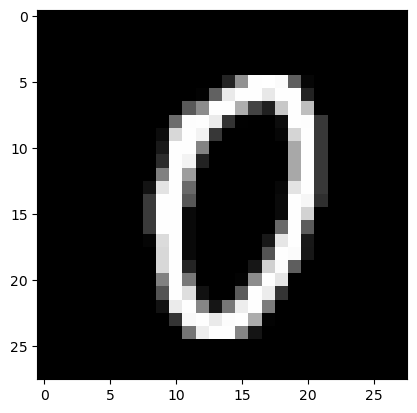

In [41]:
plt.imshow(k, cmap = 'gray')

In [37]:
# to get the corresponding lable from the train_y dataset. 

train_y[1000,:]
train_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [43]:
#The above resulted in the One Hot encoded format. Hence we will check by loading the raw data and extract the corresponding output data represented by the second element of the 
#training data in the 1000th row position. This output label should tally with the image representation. 
train_data, validate_data , test_data = load_data()
label = train_data[1][1000]
label
 

0

Now defining a common function for this

In [44]:
def image_display_with_label(index):
    train_data, validate_data , test_data = load_data()
    k = train_data[0][index,:] # we are taking the index element of the 1st array element from the raw training data. This was previously returned as train_x above
    k = k.reshape(28, 28)
    plt.title('Label is {label}'.format(label = train_data[1][index]))
    plt.imshow(k, cmap = 'gray')

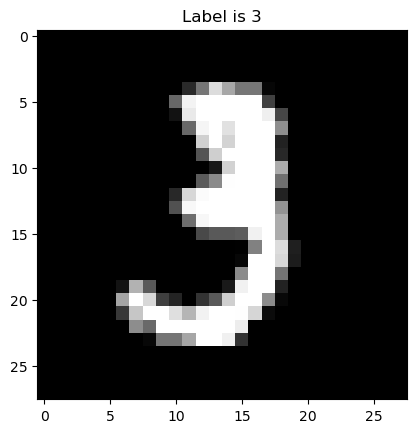

In [45]:
index = 10
image_display_with_label (index)

Now we will focus on building the Neural network model using keras

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation

Sequential() is used to define a linear stack of layers for the neural network model.

Here's a brief overview of what Sequential() does:







Model Evaluation and Prediction: Finally, you can evaluate the trained model on test data using the .evaluate() method and make predictions on new data using the .predict() method.

Initialization: When you call Sequential(), it initializes an empty sequential model. This model is a linear stack of layers, where you can add layers one by one in sequence.

In [49]:
my_model = Sequential()

Layer Addition: You can add layers to the model using the .add() method. Each layer added to the sequential model will be connected to the previous layer, forming a sequential flow of data through the model.

In [51]:
#shape = (784,)
my_model.add(Dense( units = 35, input_dim = 784, activation ='relu'))

Adding a Dropout layer

In [52]:
my_model.add(Dropout(0.3))

In [53]:
my_model.add(Dense(21, activation = 'relu'))

Adding the output layer with 10 categorical outputs and using activation function of 'Softmax' 

In [54]:
my_model.add(Dense(10, activation='softmax'))

Model Configuration: After adding layers, you can configure the model further by specifying parameters such as optimizer, loss function, and metrics for training.
Model Compilation: Once the model is configured, you compile it using the .compile() method. During compilation, you specify the optimizer, loss function, and metrics to be used for training the model.

In [55]:
my_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model Training: After compilation, you can train the model using the .fit() method, passing the input data and target labels.

In [56]:
my_model.fit(train_x, train_y, epochs=10, batch_size=10)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7744 - loss: 0.7132
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9318 - loss: 0.2398
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9460 - loss: 0.1875
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 35s 7ms/step - accuracy: 0.9538 - loss: 0.1628
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.9592 - loss: 0.1418
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9624 - loss: 0.1316
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9653 - loss: 0.1160
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9663 - loss: 0.1149
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9683 - loss: 0.1071
Epoch 10/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9699 - loss: 0.1044


The evaluate() method in machine learning frameworks like TensorFlow or Keras calculates the performance metrics of the model on the given dataset.

evaluate(): This method is called on the trained model (my_model). It takes input data (train_x) and corresponding target labels (train_y) as arguments.
%s': This is a placeholder for a string value.
%.2f: This is a placeholder for a floating-point number (float), with precision specified as 2 decimal places.
%%: This represents a literal percent sign (%). In Python string formatting, a single percent sign is used to indicate the start of a placeholder, 
and using %% escapes the percent sign so that it's treated as a literal character in the output.




In [65]:
scores_train = my_model.evaluate(train_x, train_y)
print("\n%s: %.2f%%" % (my_model.metrics_names[1], scores_train[1]*100))

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9762 - loss: 0.0782


Metrics name and Scores name are attributes of the Sequential model. 

In [62]:
my_model.metrics_names 

['loss', 'compile_metrics']

In [63]:
scores_train

[0.07889263331890106, 0.9754999876022339]

Now let us make predictions on the test data

In [76]:
#Prediction provide the output matrix against individual datasets set aside for validation data set.
prediction = my_model.predict(val_x)
print(prediction.shape)
prediction[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10)


array([8.9576315e-07, 2.5730849e-05, 6.3294297e-05, 3.3872196e-04,
       1.0460783e-06, 8.9771083e-06, 1.2734961e-07, 1.4194171e-07,
       9.9955541e-01, 5.5457740e-06], dtype=float32)

np.argmax() is a NumPy function that returns the indices of the maximum values along a specified axis of an array.
axis=1 specifies that the maximum value should be found along the second axis (axis indexing starts from 0), 
which corresponds to finding the maximum value for each sample (row) in the array.


In [77]:
# Now fetching the Maximum array element out of each row. 
predictions = np.argmax(prediction, axis = 1)
predictions[1]

8

In [81]:
scores_test = my_model.evaluate(val_x, val_y)
print("\n%s: %.2f%%" % (my_model.metrics_names[1], scores_test[1]*100))
print("\n%s: %.2f%%" % (my_model.metrics_names[0], scores_test[0]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9617 - loss: 0.1440

compile_metrics: 96.32%

loss: 13.88%
